In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#https://www.kdnuggets.com/2019/01/more-google-colab-environment-management-tips.html
!ls -la /content/drive/My\ Drive/Colab\ Notebooks/

ls: cannot access '/content/drive/My Drive/Colab Notebooks/': No such file or directory


In [ ]:
filepath = '/content/drive/MyDrive/Life Expectancy Data.csv'
data = pd.read_csv(filepath)
print(data.head())

       Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]


In [ ]:
data.shape

(2938, 22)

In [ ]:
data = data[['Country', 'Year', 'Status', 'Life expectancy ', 'GDP']]
data.head(10)

,Country,Year,Status,Life expectancy,GDP
0,Afghanistan,2015,Developing,65.0,584.259210
1,Afghanistan,2014,Developing,59.9,612.696514
2,Afghanistan,2013,Developing,59.9,631.744976
3,Afghanistan,2012,Developing,59.5,669.959000
4,Afghanistan,2011,Developing,59.2,63.537231
5,Afghanistan,2010,Developing,58.8,553.328940
6,Afghanistan,2009,Developing,58.6,445.893298
7,Afghanistan,2008,Developing,58.1,373.361116
8,Afghanistan,2007,Developing,57.5,369.835796
9,Afghanistan,2006,Developing,57.3,272.563770


In [ ]:
data[['Life expectancy ', 'GDP']].describe()

,Life expectancy,GDP
count,2928.000000,2490.000000
mean,69.224932,7483.158469
std,9.523867,14270.169342
min,36.300000,1.681350
25%,63.100000,463.935626
50%,72.100000,1766.947595
75%,75.700000,5910.806335
max,89.000000,119172.741800


In [ ]:
print(data.shape[0])
print(data.isnull().sum())

2938
Country               0
Year                  0
Status                0
Life expectancy      10
GDP                 448
dtype: int64


handled missing values with mean value of corresponding column using SimpleImputer.

In [ ]:
# from sklearn.impute import SimpleImputer 

# imputer = SimpleImputer(missing_values = np.nan,  strategy ='mean') 
# imputer = imputer.fit(data)
# data = imputer.transform(data)

In [ ]:
# # https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/
# columns = ['Life expectancy ', 'GDP']
# for col in columns:
#     data[col].replace(np.NaN, data[col].mean(), inplace = True) 
# data.isnull().sum()

In [ ]:
data.dropna(inplace=True)
print(data.isnull().sum())

Country             0
Year                0
Status              0
Life expectancy     0
GDP                 0
dtype: int64


In [ ]:
len(data['Country'].unique())

193

In [ ]:
data[['Life expectancy ', 'GDP']].describe()

,Life expectancy,GDP
count,2485.000000,2485.000000
mean,69.370664,7494.210719
std,9.645918,14282.251492
min,36.300000,1.681350
25%,63.100000,463.852618
50%,72.200000,1764.973870
75%,76.000000,5932.899677
max,89.000000,119172.741800


In [ ]:
max_gdp = 0
for gdp in data['GDP']:
    if gdp > max_gdp:
        max_gdp = gdp

print(max_gdp)

119172.7418


In [ ]:
# for i, row in data.iterrows():
# 	print(f"Index: {i}")
# 	print(f"{row}\n")

In [ ]:
data[['Life expectancy ', 'GDP']].corr(method="pearson")

,Life expectancy,GDP
Life expectancy,1.000000,0.461455
GDP,0.461455,1.000000


In [ ]:
r,p = scipy.stats.pearsonr(data['Life expectancy '], data['GDP'])
print("r = "+str(round(r,6)), ", p = "+str(p))

r = 0.461455 , p = 2.7086740985180166e-131


In [ ]:
data_bd = data[data.Country=='Bangladesh']
data_bd

,Country,Year,Status,Life expectancy,GDP
192,Bangladesh,2015,Developing,71.8,121.158120
193,Bangladesh,2014,Developing,71.4,184.565430
194,Bangladesh,2013,Developing,71.0,951.889454
195,Bangladesh,2012,Developing,77.0,856.342857
196,Bangladesh,2011,Developing,73.0,835.789341
197,Bangladesh,2010,Developing,69.9,757.671757
198,Bangladesh,2009,Developing,69.5,681.125368
199,Bangladesh,2008,Developing,69.1,615.777541
200,Bangladesh,2007,Developing,68.6,541.651484
201,Bangladesh,2006,Developing,68.2,494.514660


In [ ]:
data_bd[['Life expectancy ', 'GDP']].describe()

,Life expectancy,GDP
count,16.000000,16.000000
mean,69.300000,443.561481
std,3.037762,328.799934
min,65.300000,4.613575
25%,67.175000,102.558069
50%,68.850000,489.335065
75%,71.100000,700.261965
max,77.000000,951.889454


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



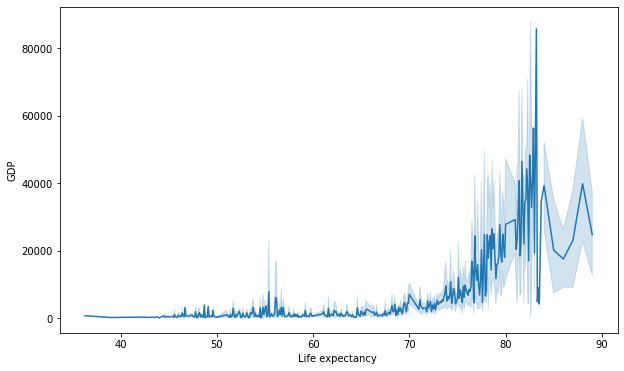

In [ ]:
plt.figure(figsize=(10,6))
x,y = data['Life expectancy '], data['GDP']
sns.lineplot(x,y)
# plt.title('Life Expectancy vs GDP of for all the coutries')
plt.show()

In [ ]:
# pd.options.plotting.backend = "plotly"
plt.figure(figsize=(10,6)) 
# data_bd  = data_bd[['Year','Life expectancy ', 'GDP']]
# data_bd.plot(x='Year', y=['Life expectancy ', 'GDP'])
fig = px.line(data_bd, x='Year', y='Life expectancy ')
fig.add_scatter(x=data_bd['Year'], y=data_bd['GDP']/10)
fig.show()

<Figure size 720x432 with 0 Axes>

No handles with labels found to put in legend.


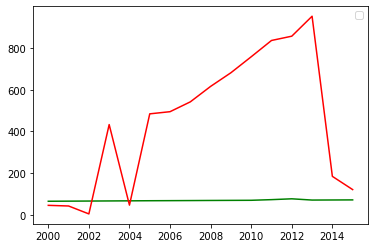

In [ ]:
plt.plot(data_bd['Year'], data_bd['Life expectancy '], color = 'green')
plt.plot(data_bd['Year'], data_bd['GDP'], color = 'red')
plt.autoscale()
plt.legend()
plt.show()

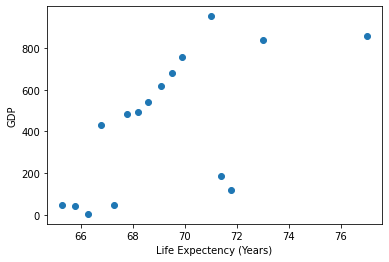

In [ ]:
# plt.plot(data_bd['Year'], data_bd['Life expectancy ']/sum(data_bd['Life expectancy ']), color = 'green')
plt.scatter(data_bd['Life expectancy '], data_bd['GDP'])
plt.xlabel('Life Expectency (Years)')
plt.ylabel('GDP')
# plt.title('Figure : Relationship Life expectency and GDP in Bangladesh')
# plt.yscale('log')
plt.show()
plt.close()

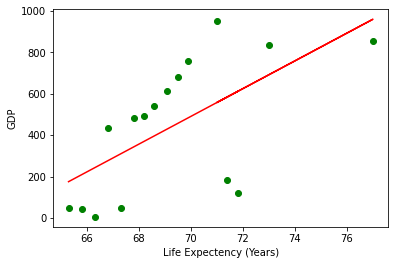

In [ ]:
x,y = data_bd['Life expectancy '], data_bd['GDP']
plt.scatter(data_bd['Life expectancy '], data_bd['GDP'], color = 'g')
plt.xlabel('Life Expectency (Years)')
plt.ylabel('GDP')
m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x+b, color='red')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



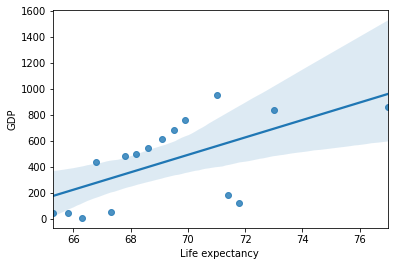

In [ ]:
x,y = data_bd['Life expectancy '], data_bd['GDP']
sns.regplot(x,y)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



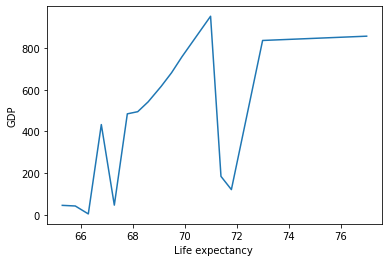

In [ ]:
x,y = data_bd['Life expectancy '], data_bd['GDP']
sns.lineplot(x,y)

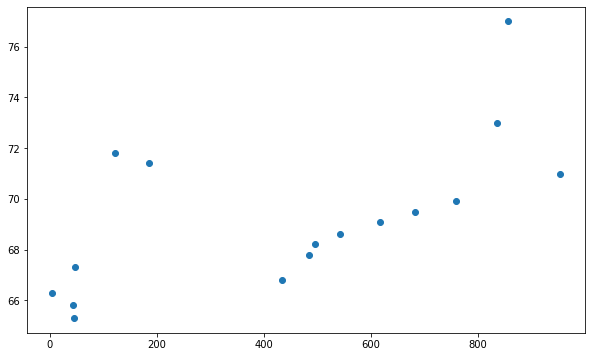

In [ ]:
plt.figure(figsize=(10,6)) 
plt.scatter(data_bd['GDP'], data_bd['Life expectancy '])
# plt.yscale('log')
plt.show()

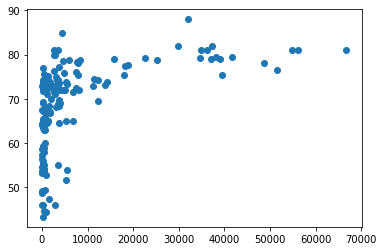

In [ ]:
data2005 = data[data.Year == 2005]
# data1yr
plt.scatter(data2005['GDP'], data2005['Life expectancy '])


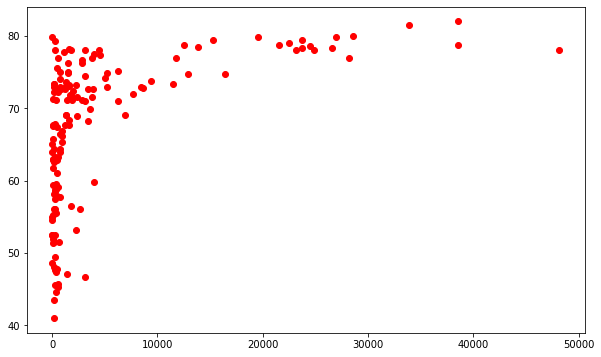

In [ ]:
data1 = data[data.Year == 2001]
# data1yr
# print(min(data['Year']))
plt.figure(figsize=(10,6)) 
plt.scatter(data1['GDP'], data1['Life expectancy '], color='red')
# plt.autoscale()
plt.show()

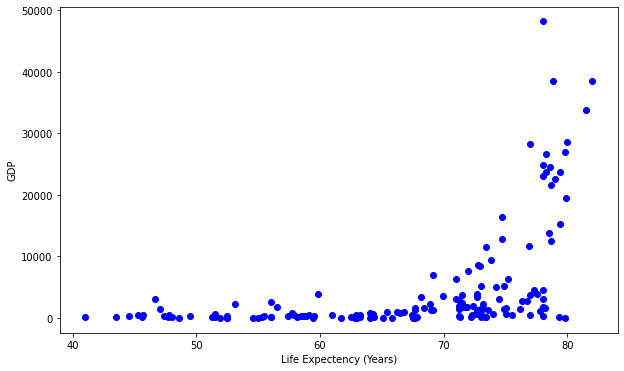

In [ ]:
data1 = data[data.Year == 2001]
# data1yr
# print(min(data['Year']))
plt.figure(figsize=(10,6)) 
# plt.scatter(data1['Life expectancy '] , data1['GDP'], color='r')
plt.scatter(data1['Life expectancy '] , data1['GDP'] , marker='o', color='b')
plt.xlabel('Life Expectency (Years)')
plt.ylabel('GDP')
# plt.plot(data1['Life expectancy '] , data1['GDP'] , marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.autoscale()
# plt.yscale('log')
plt.show()
plt.close()

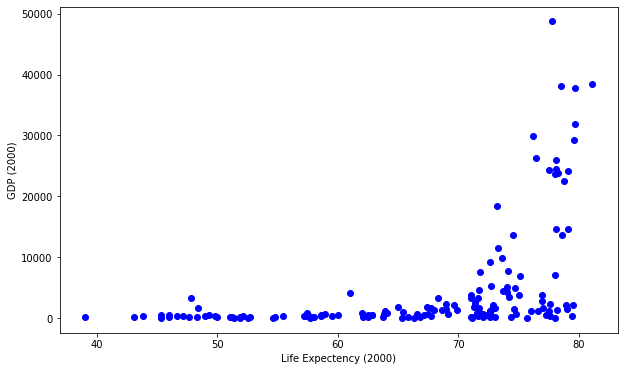

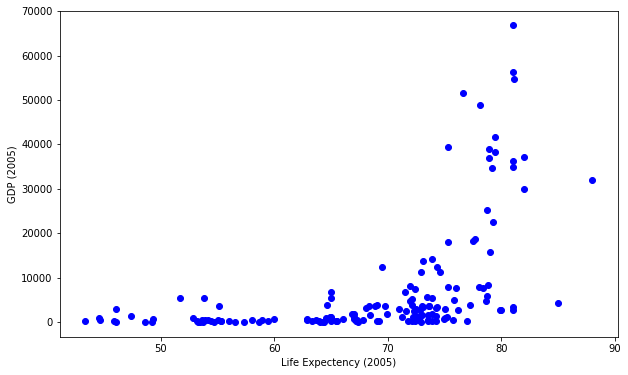

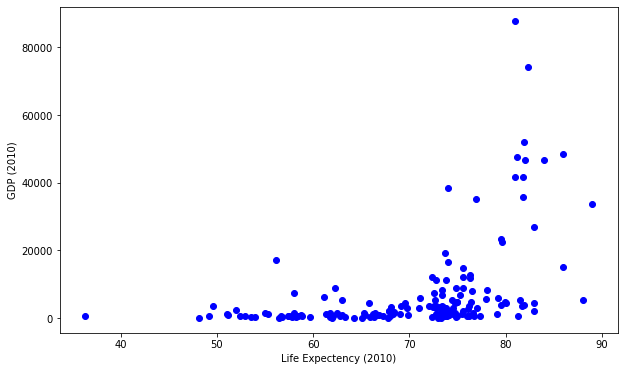

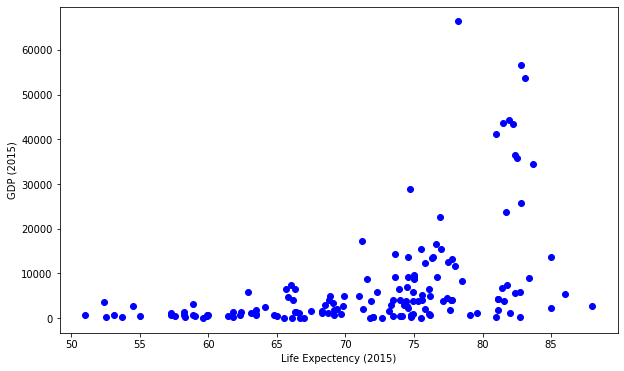

In [ ]:
years = [2000, 2005, 2010, 2015]
for year in years:
    data1 = data[data.Year == year]
    plt.figure(figsize=(10,6)) 
    plt.scatter(data1['Life expectancy '] , data1['GDP'] , marker='o', color='b')
    plt.xlabel('Life Expectency ('+str(year)+')')
    plt.ylabel('GDP ('+str(year)+')')
    # plt.yscale('log')
    plt.show()
    plt.close()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



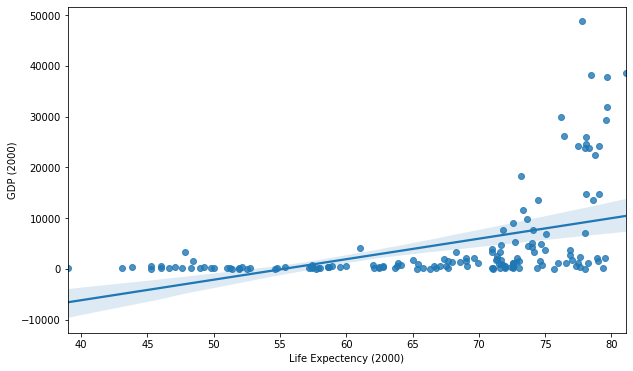

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



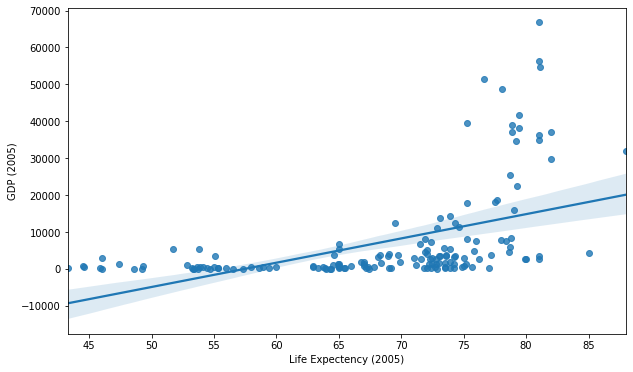

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



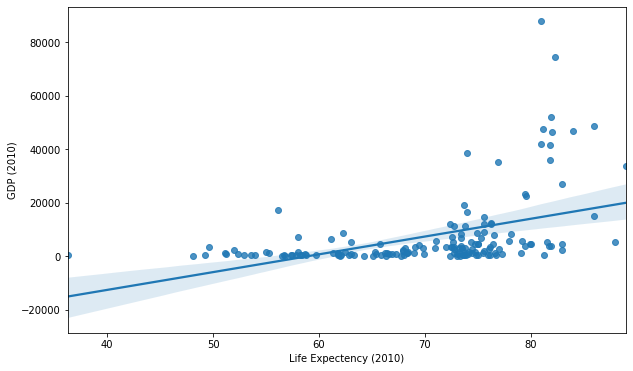

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



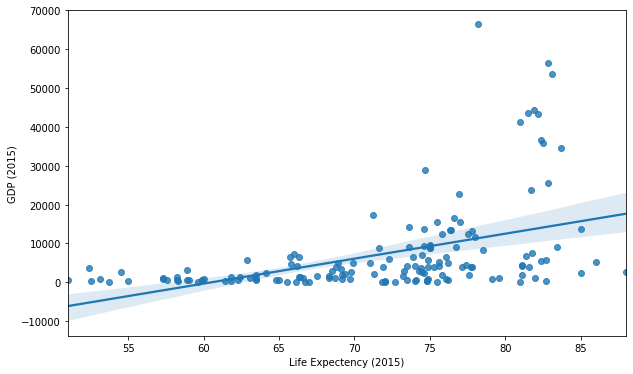

In [ ]:
years = [2000, 2005, 2010, 2015]
for year in years:
    data1 = data[data.Year == year]
    plt.figure(figsize=(10,6)) 
    x,y = data1['Life expectancy '] , data1['GDP']
    sns.regplot(x,y)
    plt.xlabel('Life Expectency ('+str(year)+')')
    plt.ylabel('GDP ('+str(year)+')')
    # plt.yscale('log')
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



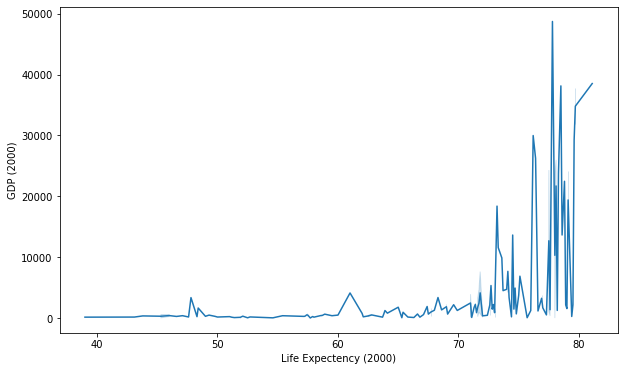

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



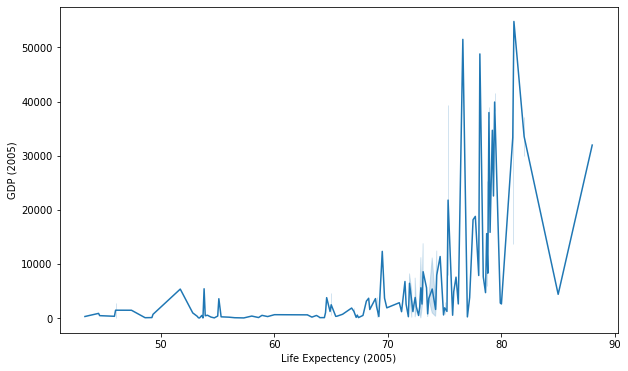

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



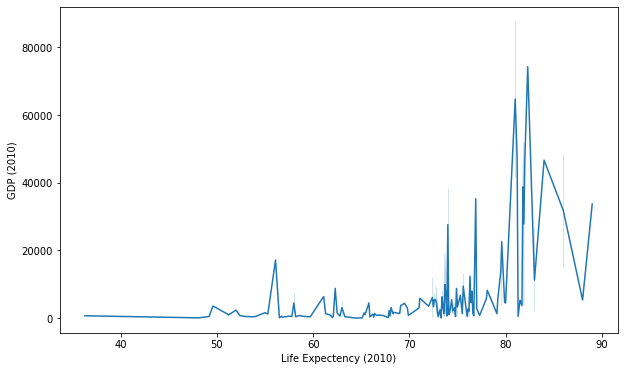

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



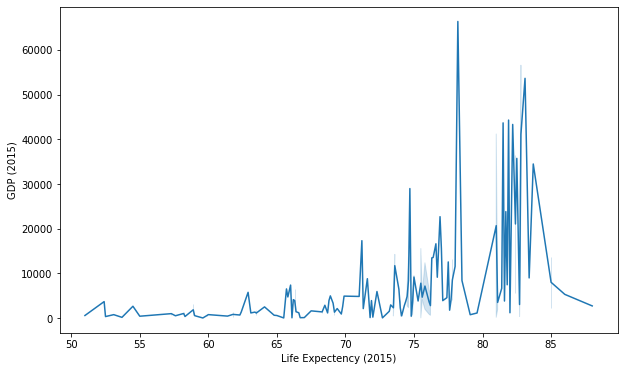

In [ ]:
years = [2000, 2005, 2010, 2015]
for year in years:
    data1 = data[data.Year == year]
    plt.figure(figsize=(10,6)) 
    x,y = data1['Life expectancy '] , data1['GDP']
    sns.lineplot(x,y)
    plt.xlabel('Life Expectency ('+str(year)+')')
    plt.ylabel('GDP ('+str(year)+')')
    # plt.yscale('log')
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



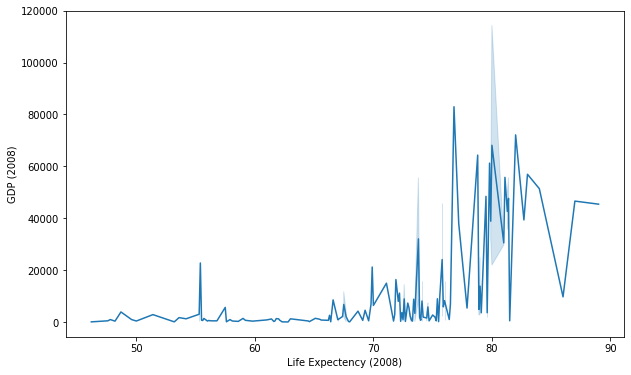

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



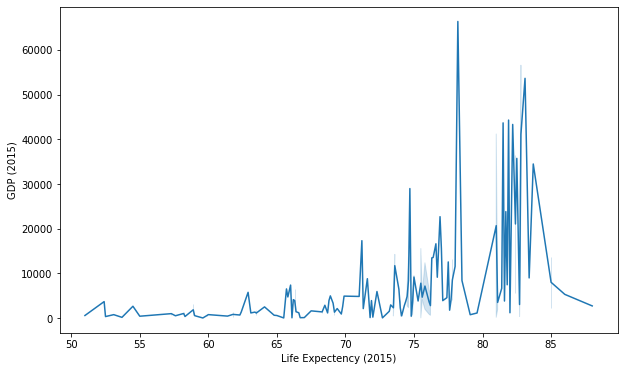

In [ ]:
years = [2008, 2015]
for year in years:
    data1 = data[data.Year == year]
    plt.figure(figsize=(10,6)) 
    x,y = data1['Life expectancy '] , data1['GDP']
    sns.lineplot(x,y)
    plt.xlabel('Life Expectency ('+str(year)+')')
    plt.ylabel('GDP ('+str(year)+')')
    # plt.yscale('log')
    plt.show()

#installing pycountry_convert , since it is not available in colab



In [ ]:
#https://stackoverflow.com/questions/51342408/how-do-i-install-python-packages-in-googles-colab
!pip install pycountry_convert

In [ ]:
data[data.Country == 'Timor-Leste']

,Country,Year,Status,Life expectancy,GDP
2601,Timor-Leste,2015,Developing,68.3,1161.769350
2602,Timor-Leste,2014,Developing,68.0,1153.515780
2603,Timor-Leste,2013,Developing,67.7,117.765674
2604,Timor-Leste,2012,Developing,67.4,1117.777240
2605,Timor-Leste,2011,Developing,67.2,114.561790
2606,Timor-Leste,2010,Developing,66.9,849.862697
2607,Timor-Leste,2009,Developing,66.6,757.311444
2608,Timor-Leste,2008,Developing,66.2,643.719110
2609,Timor-Leste,2007,Developing,65.8,524.895936
2610,Timor-Leste,2006,Developing,64.9,441.532260


#we can get the continent name using pycountry_convert

In [ ]:
# data = data.groupby()
import pycountry_convert as pc
#https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


In [ ]:
# print(country_to_continent())
data.Country[data.Country == 'Timor-Leste']


2601    Timor-Leste
2602    Timor-Leste
2603    Timor-Leste
2604    Timor-Leste
2605    Timor-Leste
2606    Timor-Leste
2607    Timor-Leste
2608    Timor-Leste
2609    Timor-Leste
2610    Timor-Leste
2611    Timor-Leste
2612    Timor-Leste
2613    Timor-Leste
2614    Timor-Leste
2615    Timor-Leste
2616    Timor-Leste
Name: Country, dtype: object

#add continent name of country as a new column of our data

In [ ]:
Continent = {}
country_list = data['Country'].unique()
# country_list
for country_name in country_list:
    #print(country)
    Continent[country_name] = country_to_continent(country_name)
#https://stackoverflow.com/questions/49817715/best-way-to-add-dictionary-to-dataframe

KeyError: ignored